# <font color='DarkSlateBlue'>Intro Data Analysis</font> 

## <font color='NavyBlue'>Titanic Data</font>

### <font color='Red'> Eu, mulher, 33 anos na 2º classe sobreviveria?</font>

In [37]:
#importando as bibliotecas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import pandas as pd
import numpy as np


In [2]:
#Machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import datasets, svm, model_selection, tree, preprocessing, metrics

In [3]:
filename = 'C:/Nanodegree/Intro_Data_Analys/titanic_data.csv'
titanic_df = pd.read_csv(filename, header=0)

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Wrangler
Pontos focais:
- Idade
- Sexo
- Acompanhantes: SibSp + Parch
- Classe

Descrição dos campos:
- Embarked: Porto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)
- Parch: Número de pais e filhos a bordo
- Pclass: Classe que o passageiro embarcou (1 = 1º classe; 2 = 2º classe; 3 = 3º classe)
- Sex: Gênero feminino (female) ou male (masculino)
- Sibsp: Numero de irmãos e esposa a bordo
- Survived: 0 - Não sobreviveu e 1 = sobreviveu

In [5]:
#Conferindo o tipo dos dados criados
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
#SibSp e Parch tem a mesma raiz de informação (total de acompanhantes), para facilitar a análise, será criada 
#uma nova coluna com o total de acompanhantes
titanic_df['Family'] = titanic_df['SibSp'] + titanic_df['Parch']

In [7]:
#influencia de Age, Fare e Family na sobrevivência
titanic_df.groupby(['Pclass', 'Sex', 'Survived']).mean()

PassengerId        Age     SibSp     Parch  \
Pclass Sex    Survived                                               
1      female 0          325.000000  25.666667  0.666667  1.333333   
              1          473.967033  34.939024  0.549451  0.428571   
       male   0          413.623377  44.581967  0.272727  0.259740   
              1          527.777778  36.248000  0.377778  0.311111   
2      female 0          423.500000  36.000000  0.500000  0.166667   
              1          444.785714  28.080882  0.485714  0.642857   
       male   0          454.010989  33.369048  0.307692  0.142857   
              1          415.588235  16.022000  0.529412  0.647059   
3      female 0          440.375000  23.818182  1.291667  1.097222   
              1          359.083333  19.329787  0.500000  0.500000   
       male   0          456.750000  27.255814  0.523333  0.213333   
              1          447.638298  22.274211  0.340426  0.297872   

                              Fare    Family  
Pclass Sex    Survived                        
1      female 0         110.604167  2.000000  
              1         105.978159  0.978022  
       male   0          62.894910  0.532468  
              1          74.637320  0.688889  
2      female 0          18.250000  0.666667  
              1          22.288989  1.128571  
       male   0          19.488965  0.450549  
              1          21.095100  1.176471  
3      female 0          19.773093  2.388889  
              1          12.464526  1.000000  
       male   0          12.204469  0.736667  
              1          15.579696  0.638298

Como a coluna Sex está em formato texto o valor retornado não é significativo, portanto valor 0 -female e 1 - Male será atribuido.

In [8]:
#Uma vez que o total de SEX é igual ao total de registros, posso testar o conteúdo de todos os valores
titanic_df['Sex_temp'] = titanic_df.Sex == "male"

#Transfa o False em 0 e o True em 1
titanic_df['Sex'] = titanic_df['Sex_temp'].as_matrix().astype(np.int)
#Apaga a coluna temporaria sex
titanic_df.drop('Sex_temp', axis=1, inplace=True)

#uma outra possibilidade:
#pd.get_dummies(titanic_df, columns='Sex'), drop_first=True)

Age tem valores nulos que serão substituidos pela idade média geral da coluna Age.

In [9]:
titanic_df.Age = titanic_df.Age.fillna(titanic_df.Age.mean())

### Excluíndo colunas 
Colunas que não serão consideradas na análise: 
1. O conteúdo de SibSp e Parch estão armazenado na nova coluna Family
2. PassengerId, Ticket e Embarked não tem conteúdo significativo no contexto selecionado
3. O dado da coluna Cabin pode ser trabalhado, por exemplo, se for considerado a primeira letra do conteúdo, mas como faltam muitos valores, e não encontrei um forte vinculo dessa variável no resultado procurado, optei por excluí-la. 77.10% de nulos


In [10]:
#Calcula o % de nulos na coluna Cabin em relação ao total de registros
perc_null_cabin = (float(sum(titanic_df['Cabin'].isnull()))/float(titanic_df['PassengerId'].count()))*100
perc_null_cabin

77.10437710437711

In [11]:
#Apaga as colunas
titanic_df.drop(['PassengerId','SibSp', 'Parch', 'Cabin','Embarked', 'Ticket','Name'], axis=1, inplace=True)

titanic_df.head()

,Survived,Pclass,Sex,Age,Fare,Family
0,0,3,1,22.0,7.2500,1
1,1,1,0,38.0,71.2833,1
2,1,3,0,26.0,7.9250,0
3,1,1,0,35.0,53.1000,1
4,0,3,1,35.0,8.0500,0


Será trabalhado com a relação da variavel Survived com Pclass, Sex, Age.

## Sumário estatístico
Aplicada aos valores númericos

- count: Total de elementos não nulos
- mean: Média
- std: Desvio Padrão
- min: Maior valor da amostra
- max: Menor valor da amostra
- 25%: Quartil 1, corresponde a 25% da amostra
- 50%: Quartil 2 ou mediana da amostra
- 75%: Quartil 3, corresponde a % da amostra

In [12]:
titanic_df.describe().fillna(0)

,Survived,Pclass,Sex,Age,Fare,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,32.204208,0.904602
std,0.486592,0.836071,0.477990,13.002015,49.693429,1.613459
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910400,0.000000
50%,0.000000,3.000000,1.000000,29.699118,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,10.000000


- Todas as linhas de todas as colunas estão preenchidas com 891 registros cada.
- A idade dos passageiros está entre 0.42 e 80 anos. 
- Para a maior parte dos passageiros (537) não foi registrado acompanhantes, mas por causa de passageiros com muitos acompanhantes a média registrada foi 0.9.

### Correlação de Pearson
Qual a corelação das variáveis como fator sobrevivência? O método pearson (.corr) foi utilizado para demonstrar a 
dependencia entre elas. O valor pode variar entre 0 e 1, tanto negativo quanto positivo.
Espera-se um grau de correlação superior a 0.5 para demonstrar uma correlação de moderada a muito forte.
    

In [13]:
titanic_df.corr(method='pearson', min_periods=1)

,Survived,Pclass,Sex,Age,Fare,Family
Survived,1.000000,-0.338481,-0.543351,-0.069809,0.257307,0.016639
Pclass,-0.338481,1.000000,0.131900,-0.331339,-0.549500,0.065997
Sex,-0.543351,0.131900,1.000000,0.084153,-0.182333,-0.200988
Age,-0.069809,-0.331339,0.084153,1.000000,0.091566,-0.248512
Fare,0.257307,-0.549500,-0.182333,0.091566,1.000000,0.217138
Family,0.016639,0.065997,-0.200988,-0.248512,0.217138,1.000000


Entre os valores demonstrados, Sex e Age são as variáveis mais correlacionadas com Survived.

# Visualizando os dados

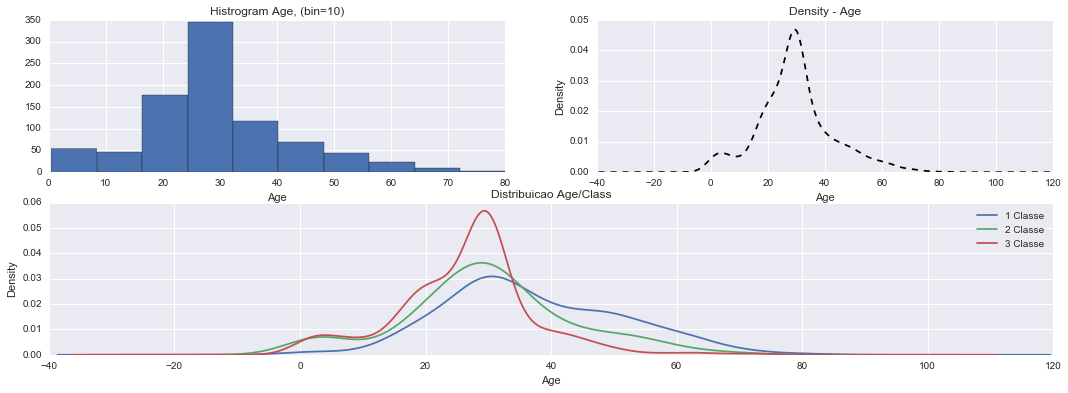

In [14]:
fig = plt.figure(figsize=(18,6), dpi=1600) 

# criando o subplot1 
ax1 = plt.subplot(2,2,1)
#Histogram da coluna Age
titanic_df.Age.hist(bins=10) 
#Definindo o label de x - Age
plt.xlabel("Age")
#Definindo o titulo do grafico
plt.title("Histrogram Age, (bin=10)")    

# criando o subplot2 
ax2 = plt.subplot(2,2,2)
#Plotando o grafico de densidade da coluna Age
titanic_df['Age'].plot(kind='kde', style='k--')
#Definindo o label do eixo y
plt.ylabel("Density")
#Definindo o label do eixo de x
plt.xlabel("Age")
#Definindo o titulo do grafico
plt.title("Density - Age")

# criando o subplot3
ax3 = plt.subplot(2,2,(3,4))
#plotando a densidade por classe
titanic_df.Age[titanic_df.Pclass == 1].plot(kind='kde')    
titanic_df.Age[titanic_df.Pclass == 2].plot(kind='kde')
titanic_df.Age[titanic_df.Pclass == 3].plot(kind='kde')
#Definindo o label do eixo de x
plt.xlabel("Age")  
#Definindo o titulo do grafico
plt.title("Distribuicao Age/Class")
#Definindo a legenda
plt.legend(('1 Classe', '2 Classe','3 Classe'),loc='best') 

### Com os dados preparados, começa a pesquisa para descobrir se uma mulher de 32 anos está na faixa média dos sobreviventes

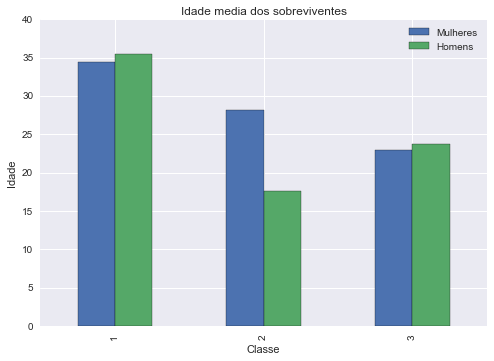

In [15]:
# Agrupa os dados por idade media dos sobreviventes por classe
survived_yes = titanic_df[titanic_df['Survived']==1]
survived_no = titanic_df[titanic_df['Survived']==0]
grouped_yes = survived_yes.groupby(['Pclass','Sex']).mean()['Age'].unstack()

#Imprime informações dos sobreviventes
grouped_yes.plot(kind='bar')
#formata configurações do grafico
plt.xlabel("Classe")
plt.ylabel('Idade')
plt.title("Idade media dos sobreviventes")   
plt.legend(('Mulheres', 'Homens'),loc='best') 

In [16]:
grouped_yes

Sex,0,1
Pclass,,
1,34.420792,35.520346
2,28.127118,17.631073
3,22.930249,23.696001


As mulheres na 2º classe que sobreviveram tinham uma media de idade de 28 anos. 
Mas a media pode ter sido influenciada por algum outlier
Quantas mulheres de 32 sobreviveram? qual a classe?

In [17]:
#Pesquisando por mulheres com 32 anos idependente de ter sobrevivido ou da classe
titanic_df[(titanic_df.Age==32) &
          (titanic_df.Sex == 0 )]

,Survived,Pclass,Sex,Age,Fare,Family
190,1,2,0,32.0,13.0000,0
218,1,1,0,32.0,76.2917,0
657,0,3,0,32.0,15.5000,2


A estatistica está a meu favor:
- 2 das 3 (66%) mulheres de 32 anos no Titanic sobreviveram
- A única mulher de 32 anos na segunda classe sobreviveu =)

In [18]:
#Normaliza a idade. Qual o std de 32 anos?
def std_feature(df):
    #retorna o standard deviation do valor solicitado
    return (df - df.mean()) / df.std(ddof=0)

#Transforma os valores do titanic_df em seu desvio padrão
titanic_std = survived_yes.apply(std_feature) 
#Apura o desvio padrao para 32 anos 
std_32 = (32 - survived_yes.Age.mean())/survived_yes.Age.std(ddof=0) 

Imprime o gráfico com o std de cada idade, destacando 32 anos

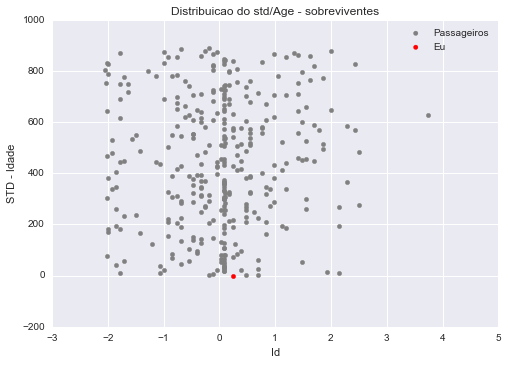

In [19]:
#Imprime scatter plot do std/Age
plt.scatter(titanic_std.Age, titanic_std.index, color='grey' )
plt.scatter(std_32, 0, color='red' )

#Configura gráfico
plt.xlabel("Id")
plt.ylabel('STD - Idade')
plt.title("Distribuicao do std/Age - sobreviventes")   
plt.legend(('Passageiros', 'Eu'),loc='best') 

Conforme visto através do método .describe(), existem outliers. 
Se existem outliers, qual a mediana das mulheres sobreviventes sobreviventes da 2º classe?

In [20]:
#Pesquisa a mediana para registros com as características: Mulhere, na 2º classe, com 32 anos e que tenha sobrevivido
titanic_df[(titanic_df.Age==32) &
          (titanic_df.Sex == 0) &
          (titanic_df.Pclass == 2)&
          (titanic_df.Survived == 1)].median()

Survived     1.0
Pclass       2.0
Sex          0.0
Age         32.0
Fare        13.0
Family       0.0
dtype: float64

## <font color='Red'>Sim, eu teria sobrevivido.</font>

## Prevendo o resultado

In [22]:
aux_df = titanic_df.copy()
#X recebe todos os valores do dataset menos a coluna Survived que será usada na comparação y
X = aux_df.drop(['Survived'], axis=1).values
#y recebe os valores da coluna Survived
y = aux_df['Survived'].values

#Divide as matrizes em teste e treino
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2)

In [23]:
decision_tree = tree.DecisionTreeClassifier(max_depth=10)
#cria a arvore de decisão 
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [24]:
 # Acurácia média dos dados de teste
decision_tree.score (X_test, y_test)

0.82681564245810057

Percentual de acurácia da árvore de decisão: 85%

In [25]:
#Gera a representação GraphViz da decision tree. O dado é gravado no arquivo titanic_tree.dot
#Os dados podem ser visualizados graficamente em http://www.webgraphviz.com/
tree.export_graphviz(decision_tree, out_file='titanic_tree.dot')

O arquivo 'titanic_tree.dot' está no github: https://github.com/liebycardoso/Intro_Data_Analysis

A fim de facilitar a visualização, foi gerado a representação GraphViz da decision tree com max_depth=2. Nos testes foi utilizado max_depth=10.   

![alt text](Tree_depth2.jpg "tree")

In [26]:
#cria o objeto Random Forest
random_forest = RandomForestClassifier(n_estimators=100,oob_score=True)
#Treina o modelo de dados
random_forest.fit(X_train, y_train)

#Prediz o resultado
Y_pred = random_forest.predict(X_test)

In [27]:
#Verifica a precisao do modelo.
random_forest.score(X_train, y_train)

0.9803370786516854

Neste caso é possível prever a sobrevivência com 98% de precisao

In [28]:
#Acuracia do resultado do modelo.82 da variável dependente pode ser explicada pelos features
random_forest.oob_score_

0.797752808988764

De acordo com o modelo utilizado, ranking de contribuição das colunas no resultado. 

In [36]:
feat_import = pd.Series(random_forest.feature_importances_, index=aux_df.drop(['Survived'], axis=1).columns)
feat_import.sort_values()
feat_import

Pclass    0.099067
Sex       0.274465
Age       0.270015
Fare      0.289414
Family    0.067039
dtype: float64

### BIBLIOGRAFIA

- Wes McKinney; Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython

Sites consultados:
- http://blog.socialcops.com/engineering/machine-learning-python
- http://developers.hekima.com/machine%20learning/python/2016/05/17/churn-prediction/
- http://hamelg.blogspot.com.br/2015/11/python-for-data-analysis-part-14.html
- http://nbviewer.jupyter.org/github/agconti/US_Dollar_Vehicle_Currency/blob/master/US_Dollar_Vehicle_Currency.ipynb
- http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb
- http://scott.fortmann-roe.com/docs/BiasVariance.html
- http://stackoverflow.com/questions/36288352/how-to-get-pandas-kde-density-with-horizontal-orientation
- http://work.caltech.edu/library/014.html
- http://work.caltech.edu/library/index.html
- http://www.r2d3.us/visual-intro-to-machine-learning-part-1/
- http://www.reshamsarkar.com/projects/2016/3/30/titanic-trauma-data-cleaning-and-munging
- http://www.ultravioletanalytics.com/2014/11/03/kaggle-titanic-competition-part-ii-missing-values/
- https://github.com/agconti/kaggle-titanic/blob/master/Titanic.ipynb
- https://github.com/justmarkham/scikit-learn-videos
- https://www.dataquest.io/mission/3/list-operations
- https://www.kaggle.com/c/titanic
- https://www.youtube.com/watch?v=0GrciaGYzV0
